## Intro_to_keras

###### more: https://keras.io/

### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

### Load Fashion MNIST dataset
###### More datasets on:https://keras.io/datasets/

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Target Names

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Some statistics about counts

In [4]:
print("Train images shape:",train_images.shape)
print("Test images shape:",train_labels.shape)

Train images shape: (60000, 28, 28)
Test images shape: (60000,)


In [5]:
print("Train images shape:",test_images.shape)
print("Test images shape:",test_labels.shape)

Train images shape: (10000, 28, 28)
Test images shape: (10000,)


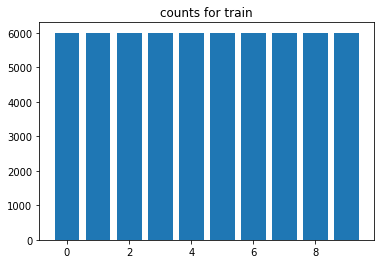

In [6]:
classes, counts = np.unique(train_labels, return_counts=1)
plt.bar(classes,counts)
plt.title("counts for train");

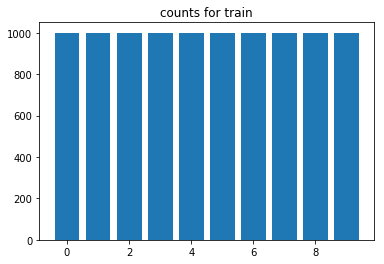

In [7]:
classes, counts = np.unique(test_labels, return_counts=1)
plt.bar(classes,counts)
plt.title("counts for train");

In [8]:
# simple function for plot random images
def plot_images(X,y,size=10):
    for i in range(size):
        idx = np.random.randint(low = 0, high = X.shape[0],size = 1)
        img = X[idx]
        label = class_names[y[idx][0]]
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.title(label)
        plt.show()
        

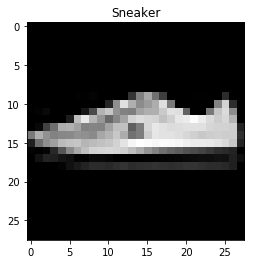

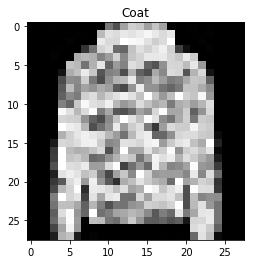

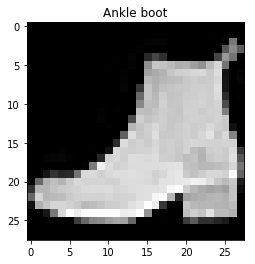

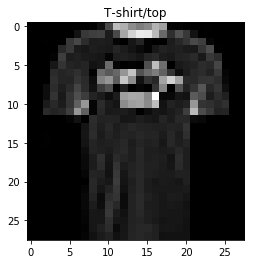

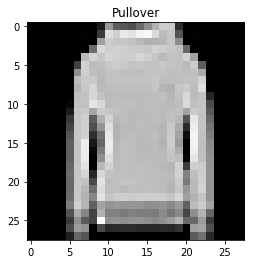

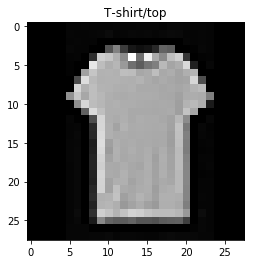

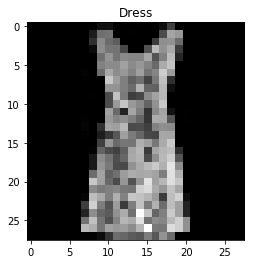

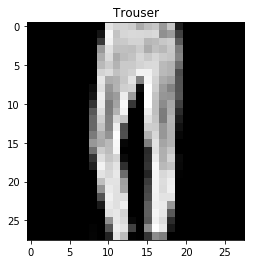

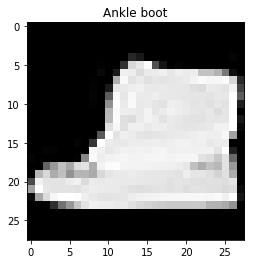

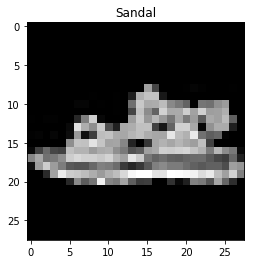

In [9]:
plot_images(train_images,train_labels)

### Normalize images

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### Build model
#### see more: 
https://keras.io/models/about-keras-models/
https://keras.io/models/sequential/
https://keras.io/layers/core/

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

W0714 19:45:03.726636 139683361445696 deprecation.py:506] From /root/environments/my_env/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
keras.backend.clear_session()


In [15]:
# second version

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [52]:
plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


### With model.compile() we can chose our loss, metrics and optimizer

###### see more: https://keras.io/models/model/


In [13]:
#simple way
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### SetCallbacks
##### More:https://keras.io/callbacks/

In [17]:
checkpoint = ModelCheckpoint("my_model_checkpoint.h5",monitor='val_loss',save_best_only=False)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, pateince=2, min_lr=0.0009)
callbacks = [checkpoint, reduce_lr]
optmimizer = Adam(learning_rate=0.001,beta_1=0.9, beta_2=0.999)

In [22]:
model.compile(optimizer=Adam(lr=0.0015),
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"])

### Train our model with model.fit()
#### model.fit() method return history of training procces

In [23]:
history = model.fit(train_images, train_labels, validation_split = 0.33, epochs=10,callbacks=callbacks)



Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 2s 50us/sample - loss: 0.5179 - acc: 0.8193 - val_loss: 0.4121 - val_acc: 0.8514
Epoch 2/10
40199/40199 [==============================] - 2s 48us/sample - loss: 0.3893 - acc: 0.8586 - val_loss: 0.3918 - val_acc: 0.8583
Epoch 3/10
40199/40199 [==============================] - 2s 47us/sample - loss: 0.3496 - acc: 0.8715 - val_loss: 0.3642 - val_acc: 0.8711
Epoch 4/10
40199/40199 [==============================] - 2s 48us/sample - loss: 0.3246 - acc: 0.8802 - val_loss: 0.3906 - val_acc: 0.8600
Epoch 5/10
40199/40199 [==============================] - 2s 46us/sample - loss: 0.3076 - acc: 0.8871 - val_loss: 0.3551 - val_acc: 0.8778
Epoch 6/10
40199/40199 [==============================] - 2s 45us/sample - loss: 0.2959 - acc: 0.8919 - val_loss: 0.3344 - val_acc: 0.8813
Epoch 7/10
40199/40199 [==============================] - 2s 45us/sample - loss: 0.2795 - acc: 0.8954 - val_loss: 0.

#### We can visualize training and validation loss

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


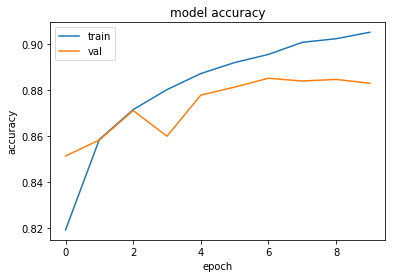

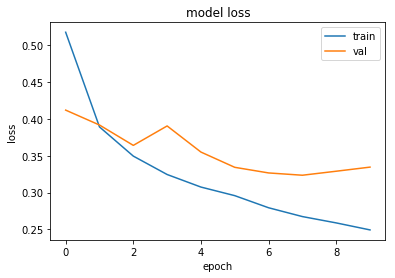

In [24]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

### Evaluate loss and accuracy on test dataset

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\n Accuracy in test dataset:', test_acc)

10000/10000 [==============================] - 0s 18us/sample - loss: 0.3655 - acc: 0.8727

 Accuracy in test dataset: 0.8727


### Save model weights 

In [19]:
model.save_weights("My_first_model.h5")

### Load weights

In [20]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [21]:
model2.load_weights("My_first_model.h5")

In [35]:
pred_softmax = model2.predict_on_batch(test_images)
test_prediction = np.argmax(pred_softmax,axis=1)
print(classification_report(test_labels,test_prediction))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1000
           1       0.98      0.95      0.97      1000
           2       0.53      0.87      0.66      1000
           3       0.81      0.88      0.84      1000
           4       0.78      0.61      0.68      1000
           5       0.98      0.91      0.94      1000
           6       0.75      0.35      0.48      1000
           7       0.88      0.97      0.92      1000
           8       0.95      0.93      0.94      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.82     10000
   macro avg       0.84      0.82      0.82     10000
weighted avg       0.84      0.82      0.82     10000

